# Jamboree Admission - Linear Regression Project

## 1. Problem Statement
* Jamboree has helped thousands of students make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving
* methods ensure maximum scores with minimum effort.
* The task here is use the diferent exam scores obtained by students and predict their possibility of admission. 
* First we need to perform a details exploratory data analysis and based on the insights, we can can have an idea on which features are more
useful.

## Loading Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Jamboree_Admission.csv')

#Displaying first 5 entries
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Exploratory Data Analysis

### Checking the structure & characteristics of the dataset


In [3]:
# Display the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


The dataset contains 500 entries and 8 columns. All columns have complete data with no missing values. There are four integer columns and four float columns. There are no categorical variables in this dataset.


In [4]:
# Statistical summary of the dataset
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
# Drop the unique row identifier as it doesn't add value to our analysis
df.drop('Serial No.', axis=1, inplace=True)

The `Serial No.` column is dropped as it does not contribute to the prediction model and might bias the results.

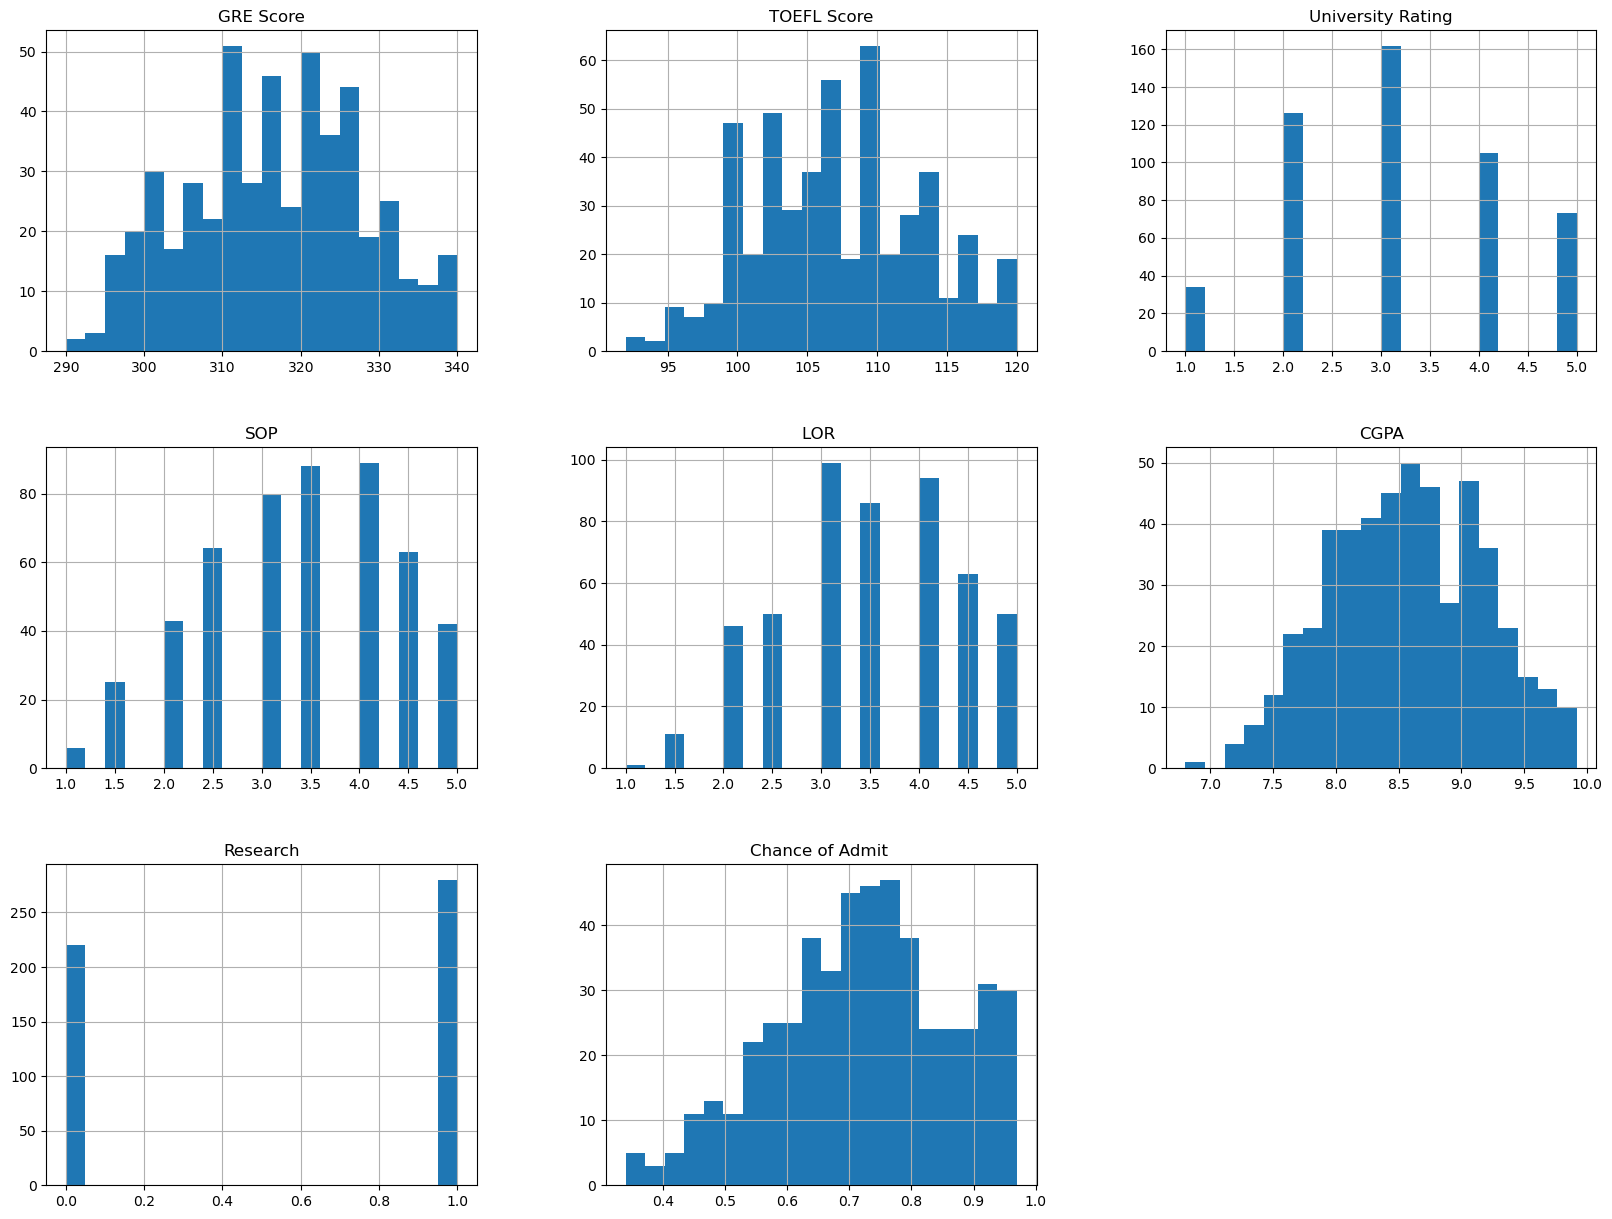

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import norm, probplot


# Distribution of continuous variables
df.hist(bins=20, figsize=(20,15))
plt.show()

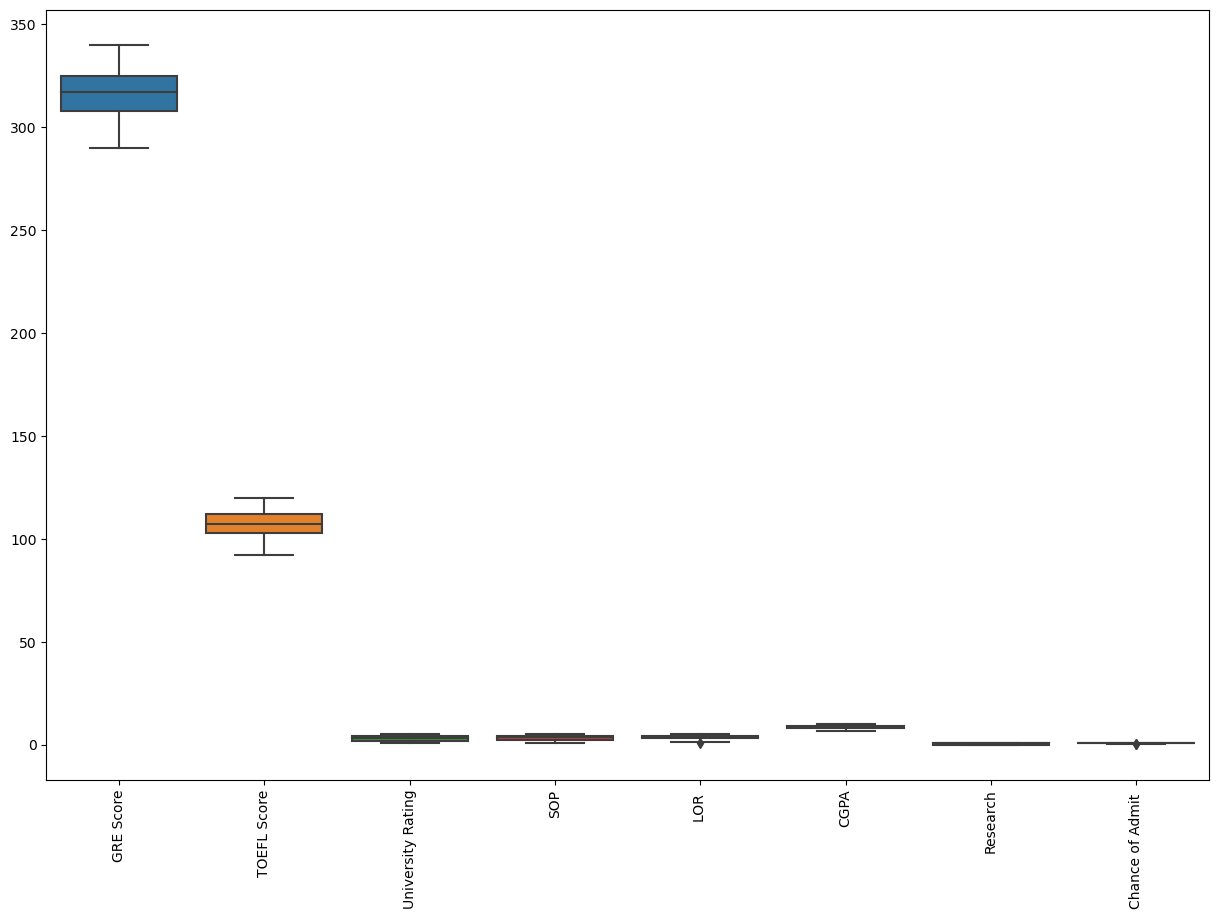

In [7]:
# Box plots for continuous variables to detect outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

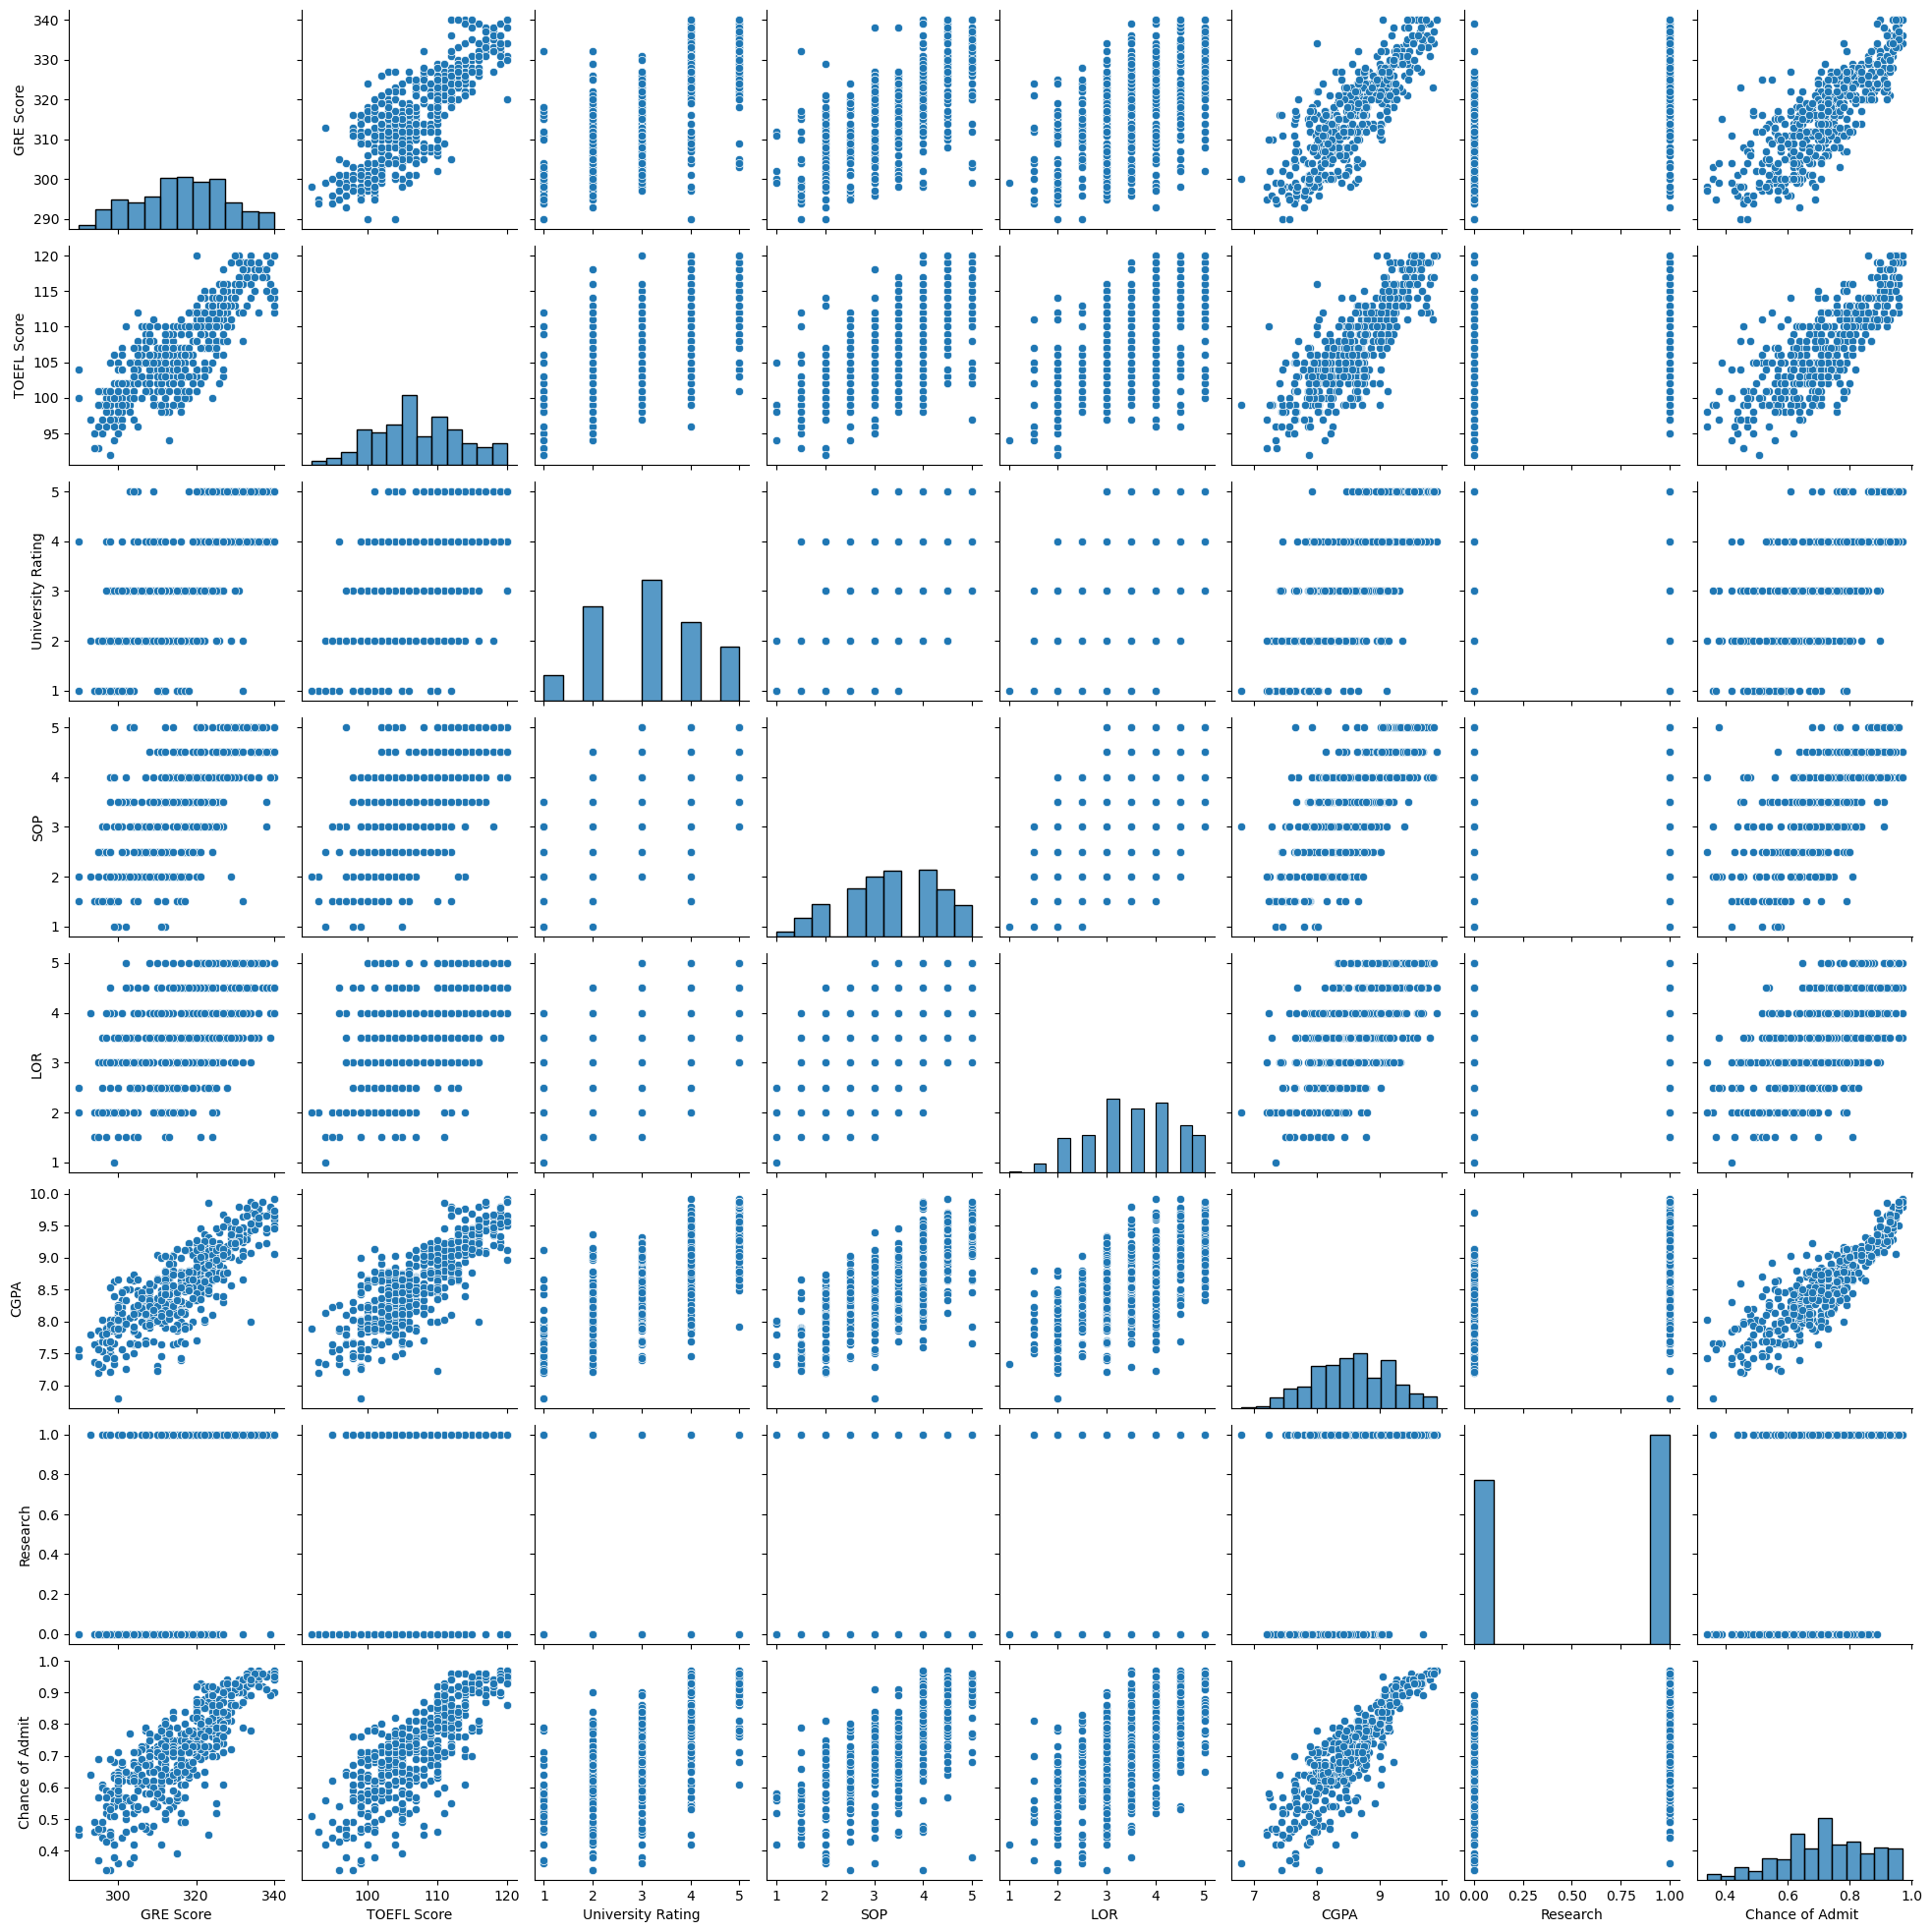

In [8]:
# Pairplot to understand relationships between variables
sns.pairplot(df)
plt.show()

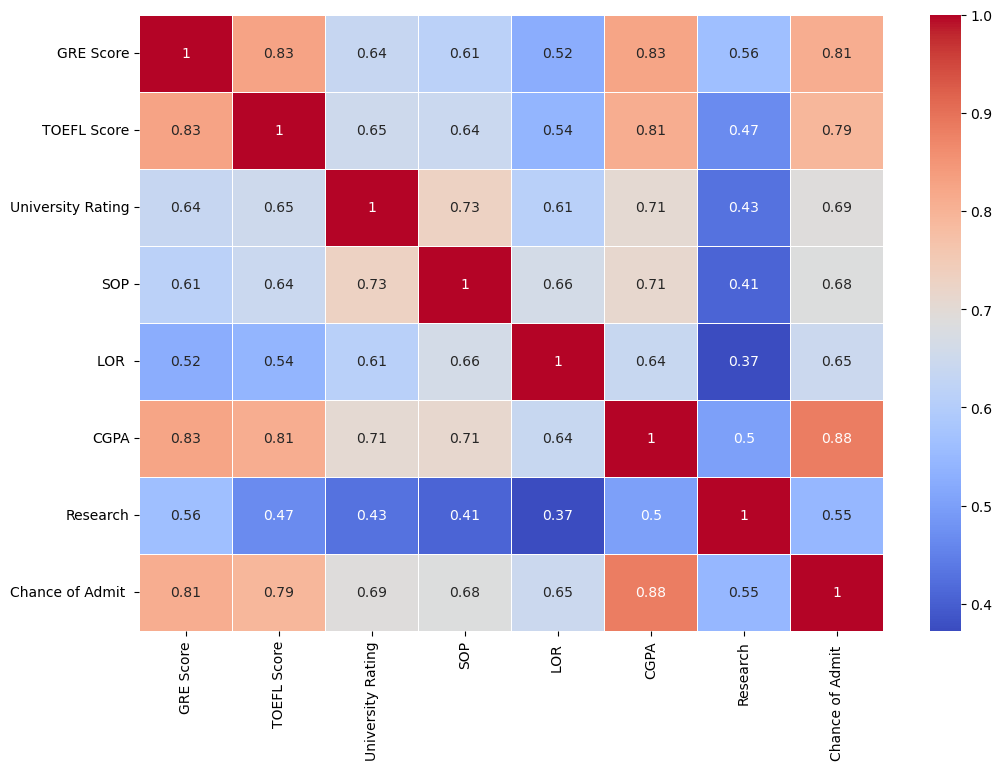

In [9]:
# Correlation matrix to check for multicollinearity
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

* It can be observed that many features have high correlation with other features. e.g. TOFEL score is highly correlated with GRE score and
vice versa.
* But one thing to note here is all the features have a good correclation with Chances of Admin (target variable).
* Research faeature has the least correlation with target variable. It can be because of binary nature of the feature (just 0 or 1 value)

### Data Preprocessing

In [10]:
# Check for duplicate values
print(f'Duplicate rows: {df.duplicated().sum()}')

# Check for missing values
print(f'Missing values: {df.isnull().sum().sum()}')

Duplicate rows: 0
Missing values: 0


## Model Building

In [11]:
#Importing sci-kit learn packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Data preparation for modelling

In [12]:
# Define feature variables (X) and target variable (y)
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [13]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Display the model coefficients
print(f'Coefficients: {lr_model.coef_}')
print(f'Intercept: {lr_model.intercept_}')

Coefficients: [0.00243444 0.00299587 0.0025688  0.00181369 0.01723798 0.11252708
 0.02402679]
Intercept: -1.4214470719016483


### Ridge Regression

In [14]:
# Initialize and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Display the model coefficients
print(f'Coefficients: {ridge_model.coef_}')
print(f'Intercept: {ridge_model.intercept_}')

Coefficients: [0.00252146 0.0030726  0.00276683 0.00216403 0.01747795 0.10907905
 0.02367853]
Intercept: -1.4300984665362848


### Lasso Regression

In [15]:
# Initialize and train the Lasso Regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Display the model coefficients
print(f'Coefficients: {lasso_model.coef_}')
print(f'Intercept: {lasso_model.intercept_}')

Coefficients: [0.00796204 0.00378626 0.         0.         0.         0.
 0.        ]
Intercept: -2.2040201110650455


## Testing Assumptions of Linear Regression

### Multicollinearity check by VIF score


In [16]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

             feature          VIF
0          GRE Score  1308.061089
1        TOEFL Score  1215.951898
2  University Rating    20.933361
3                SOP    35.265006
4               LOR     30.911476
5               CGPA   950.817985
6           Research     2.869493


* Removing or combining features with high VIF values may be helpful. For instance, GRE Score and TOEFL Score might be combined into a single feature representing overall academic performance.
* PCA can be used to reduce the dimensionality of the dataset while retaining most of the variability.
* Implementing Ridge or Lasso regression to handle multicollinearity by adding a penalty to the regression.

### Mean of residuals

In [17]:
# Predict on training set
y_train_pred = lr_model.predict(X_train)
residuals = y_train - y_train_pred

# Mean of residuals
print(f'Mean of residuals: {np.mean(residuals)}')

Mean of residuals: 3.1488700535931004e-16


### Linearity of variables

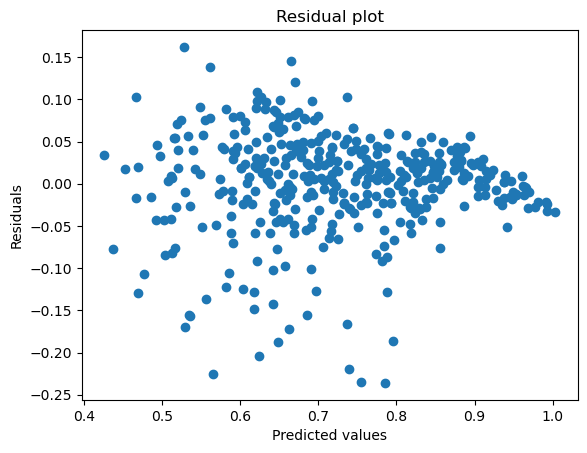

In [18]:
# Residual plot
plt.scatter(y_train_pred, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

### Normality of residuals

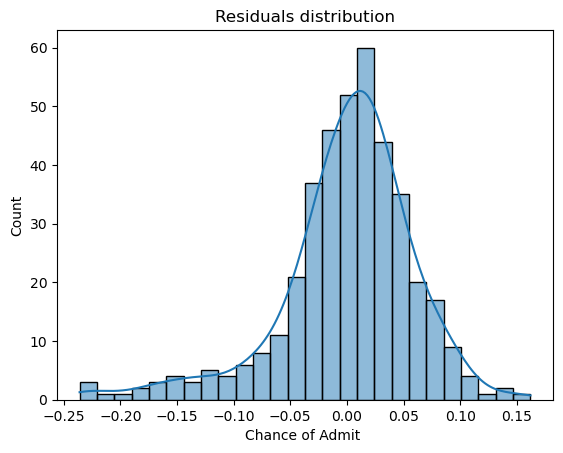

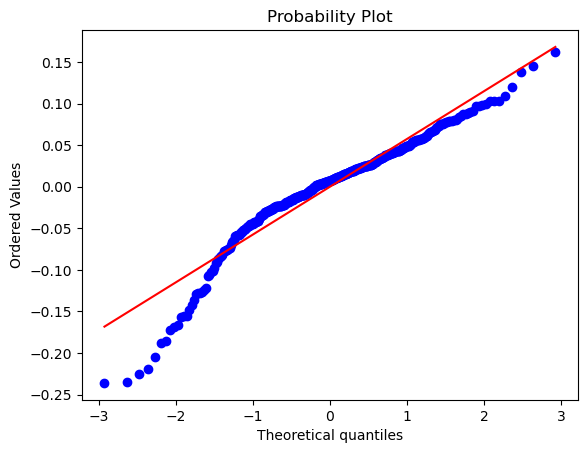

In [19]:
# Residuals distribution
sns.histplot(residuals, kde=True)
plt.title('Residuals distribution')
plt.show()

# Q-Q plot
probplot(residuals, dist="norm", plot=plt)
plt.show()

## Model Performance Evaluation

In [20]:
# Predict on test set
y_test_pred = lr_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)
adjusted_r2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'Adjusted R2: {adjusted_r2}')

MAE: 0.04272265427705367
RMSE: 0.060865880415783113
R2: 0.8188432567829629
Adjusted R2: 0.816265823444509


## Actionable Insights & Recommendations
* Linear regression models were trained on the given data and those performed fairly well but there is a scope for improvement.
* The first actionable item would be to get more data and increase training data size as 300-350 rows (excluding validation and test data) are lesser to train a model.
* Another improvement we can do is to get the data related to Statement of purpose or Recommendation letter. e.g. If we have text data in SOP and LOR, we can use that to add more value to features.
* Another thing we can add is the field of research. We do have a flag called research experience but if we the field of research then it would add more value and match the students with similar research university
* If we include the undergraduate university and degree details then that can also be an useful feature.
* University details can also be added to have a larger insight on chances of admission.
